# CLUSTERING ANALYSIS

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
#Checking null values
print("Checking null values\n",df.isna().sum())
#checking the datatypes
print("Checking data types\n",df.dtypes)

Checking null values
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Checking data types
 Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object


# EDA

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


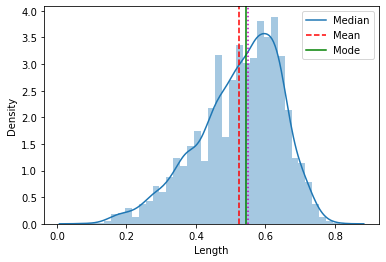

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


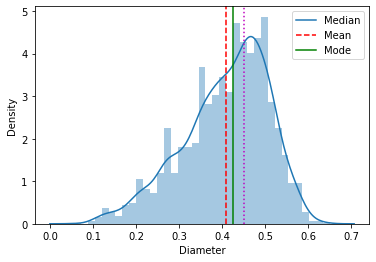

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


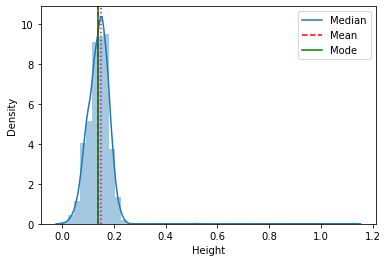

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


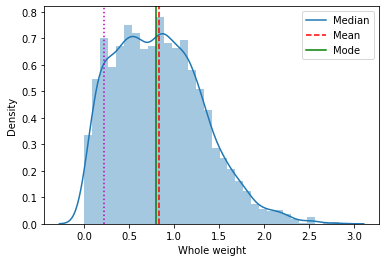

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


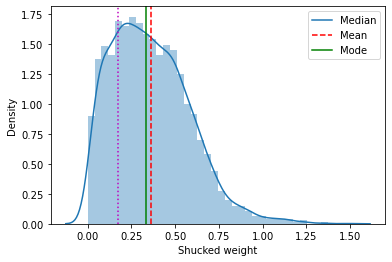

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


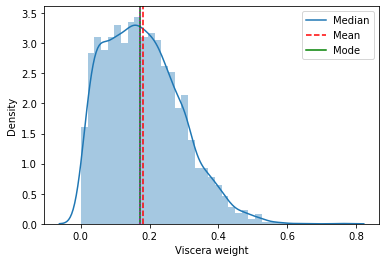

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


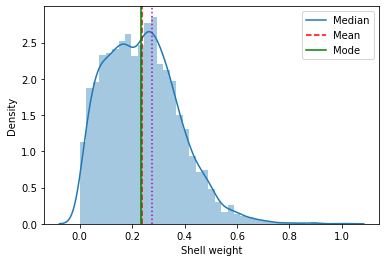

C:\Users\MEGHA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


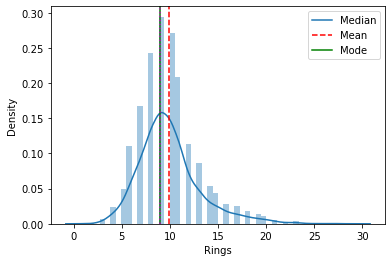

In [5]:
#univariate analysis
dis_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
for i in dis_cols :
    
    sns.distplot(df[i])
    
    plt.axvline(df[i].mean(),   color='r', linestyle= '--')
    plt.axvline(df[i].median(), color='g', linestyle="-")
    plt.axvline(df[i].mode()[0],   color='m', linestyle='dotted')
    
    plt.legend({'Mean', 'Median', 'Mode'})
    plt.show();

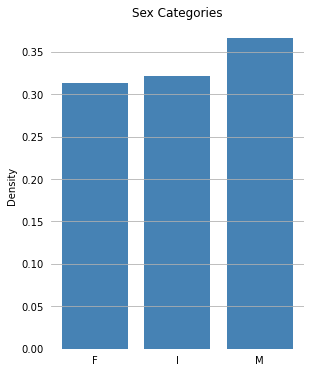

In [6]:
#visualizing sex category
df_sex_category = df.Sex.value_counts(normalize=True).sort_index()
x = range(len(df_sex_category))
figure = plt.figure(figsize=(10, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.bar(x, df_sex_category, color="steelblue",align="center")
axes1.set_xticks(x)
# Set x axis tick labels
axes1.set_xticklabels(df_sex_category.axes[0])
# Set x and y axis chart label
axes1.set_title("Sex Categories")
axes1.set_ylabel("Density")
axes1.xaxis.grid(False)
# Remove all of the axis tick marks
axes1.tick_params(bottom=False, top=False, left=False, right=False)
for spine in axes1.spines.values():
    spine.set_visible(False)
axes1.yaxis.grid(b=True, which="major");

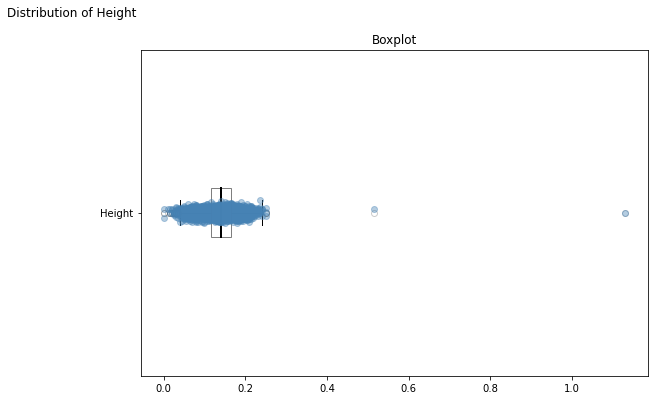

In [15]:
#distribution og height
def restyle_boxplot(patch):
    # change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    # change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    # change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    # change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)

def numeric_boxplot(numeric_df, label, title):
    figure = plt.figure(figsize=(20, 6))
    # Add Main Title
    figure.suptitle(title)
    # Left side: Boxplot 1
    #axes1 = figure.add_subplot(1, 2, 1)
    #patch = axes1.boxplot(numeric_df, labels=[label], vert=False, showfliers = True, patch_artist=True, zorder=1)
    #restyle_boxplot(patch)
    #axes1.set_title('Boxplot 1')
    # Right side: Boxplot 2
    axes2 = figure.add_subplot(1, 2, 2)
    patch = axes2.boxplot(numeric_df, labels=[label], vert=False, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes2.set_title('Boxplot')
    y = np.random.normal(1, 0.01, size=len(numeric_df))
    axes2.plot(numeric_df, y, 'o', color='steelblue', alpha=0.4, zorder=2)
    plt.show()
    plt.close()
numeric_boxplot(df.Height, 'Height', 'Distribution of Height')

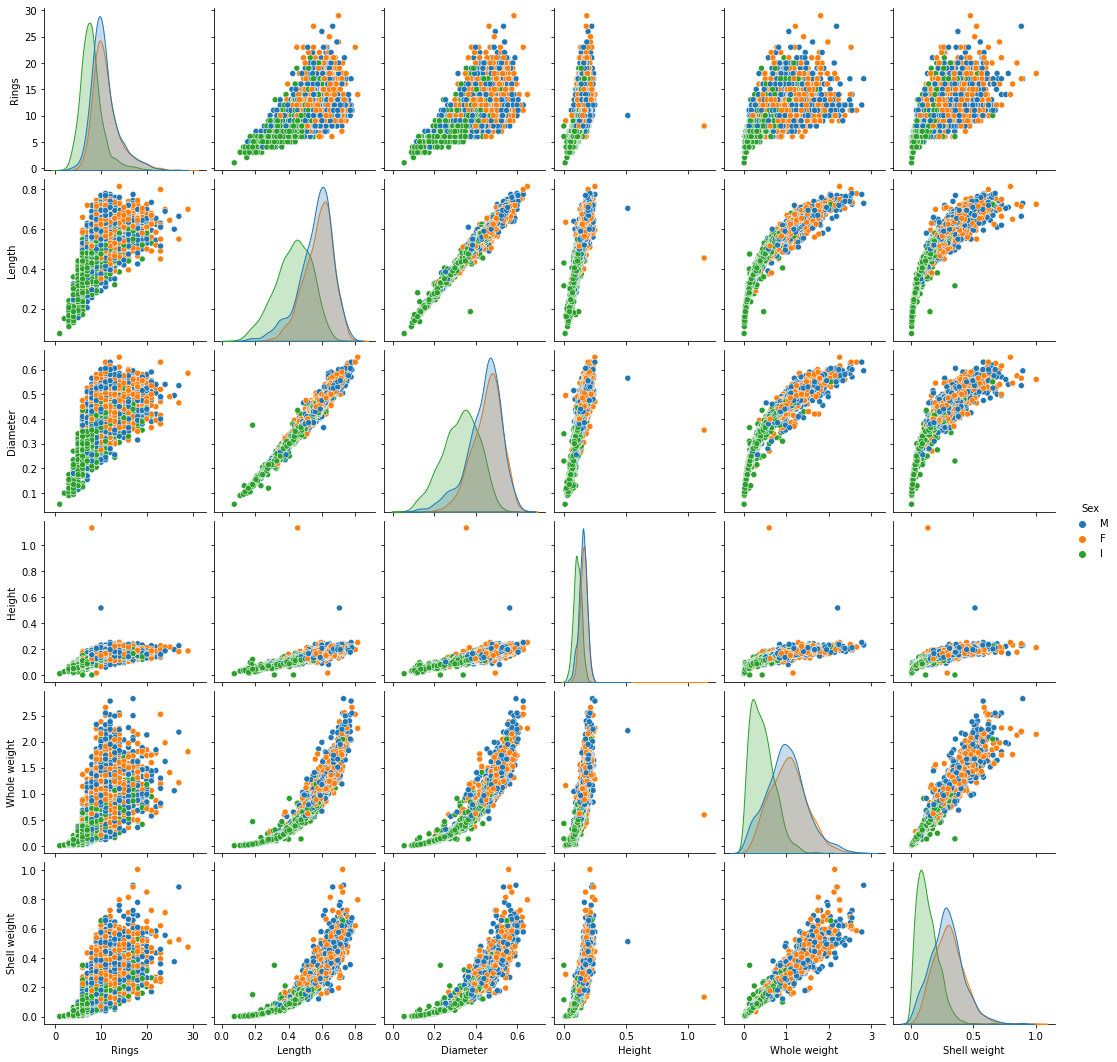

In [8]:
#bivariate analysis
sns.pairplot(df, vars = ['Rings', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight'], hue='Sex')


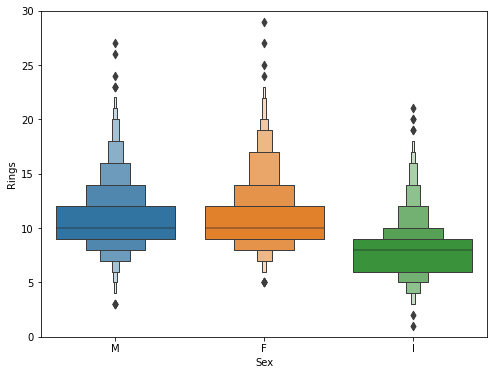

In [9]:
data = pd.concat([df['Rings'], df['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=df)
fig.axis(ymin=0, ymax=30);

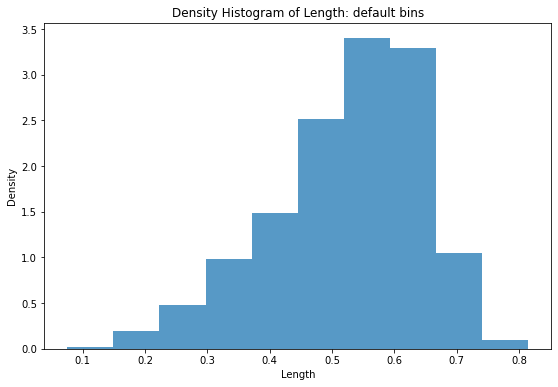

In [10]:
# histogram to visualize the shape of the distribution
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 2)
axes.hist(df.Length, density=True, alpha=0.75)
axes.set_title("Density Histogram of Length: default bins")
axes.set_ylabel("Density")
axes.set_xlabel("Length")
axes.xaxis.grid(False)
plt.show()
plt.close()

<Figure size 1440x360 with 0 Axes>

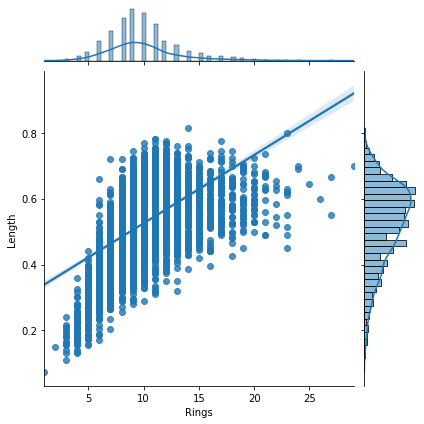

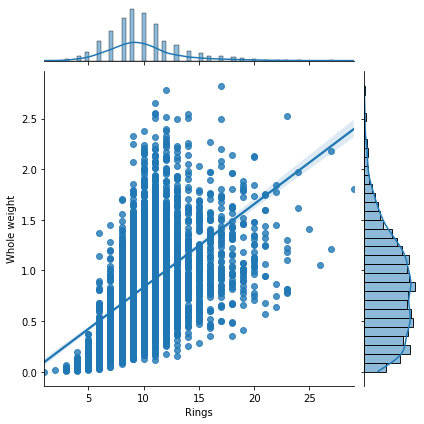

In [11]:
#multivariate analysis :
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df, x='Rings', y='Length', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Whole weight', kind='reg')

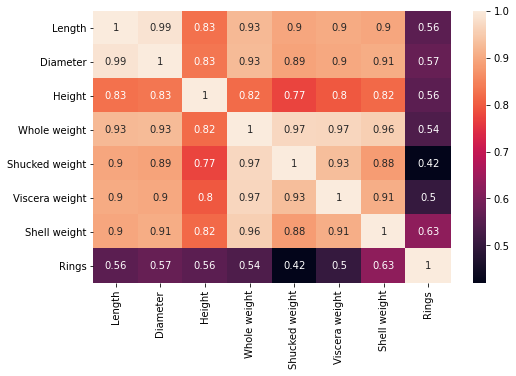

In [12]:
#Heatmap : to see correlation
plt.figure(figsize = (8,5))
corr = df.corr()
sns.heatmap(corr, annot = True);

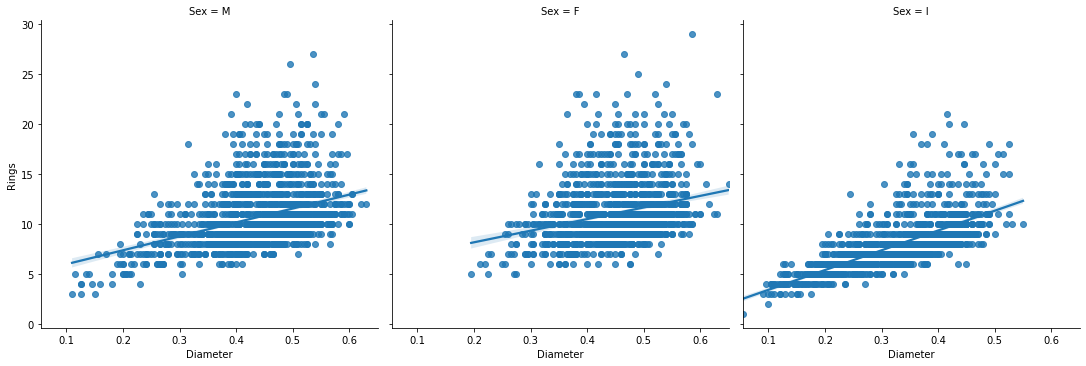

In [13]:
#Scatterplot with regression line

sns.lmplot(x='Diameter',y='Rings',data=df,col='Sex',palette = "red")

<Figure size 1440x360 with 0 Axes>

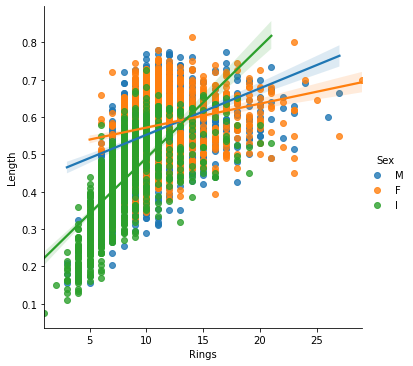

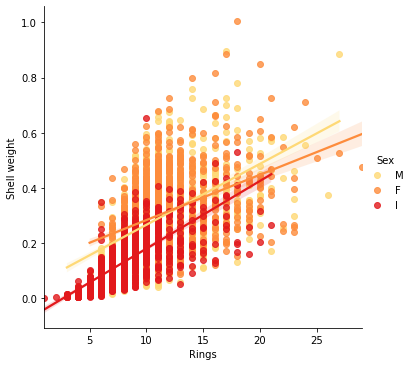

In [14]:
#scatter plot with regression line
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=df, x='Rings', y='Length', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=df, x='Rings', y='Shell weight', hue='Sex', fit_reg=True,palette = "YlOrRd")

we observe here Infant abalones have lower values of Rings, the consequence is that Length and Shell weight have stronger correlation to rings.
Observing the regression curve for the Infant category, we notice that its inclination is closer to 45°.

# 

# Splitting of dataset

In [6]:
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Rings']]#predictors
Y = df["Sex"]#Target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [8]:
#breakdown
print("Class counts")
print(Y_test.value_counts())

Class counts
M    445
I    423
F    386
Name: Sex, dtype: int64


In [9]:
#breakdown
print("Class proportion")
print(Y_test.value_counts()/len(Y_test))

Class proportion
M    0.354864
I    0.337321
F    0.307815
Name: Sex, dtype: float64


   # K-MEANS CLUSTERING - BY MEGHA & ALEKHYA

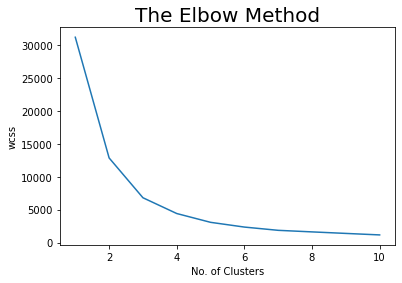

In [10]:
#kmeans clustering
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X_train)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    #building clustering model
    km = KMeans(n_clusters = k,random_state = 0).fit(X_train)
 #training the model and storing
    labels_km=km.fit_predict(X_train)
    print('Cluster: ',k,'Silhoutee score :' ,silhouette_score(X_train, labels_km))

Cluster:  2 Silhoutee score : 0.5855129489273415
Cluster:  3 Silhoutee score : 0.5129124108648834
Cluster:  4 Silhoutee score : 0.504421647334708
Cluster:  5 Silhoutee score : 0.49861452293242975
Cluster:  6 Silhoutee score : 0.4926914709229422
Cluster:  7 Silhoutee score : 0.4915672598165344
Cluster:  8 Silhoutee score : 0.48351442099718167
Cluster:  9 Silhoutee score : 0.4738069872171963


In [12]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [13]:
km.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [23]:
NN=X_train
NN['predict'] =km.fit_predict(NN)

<ipython-input-23-1cac121540c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NN['predict'] =km.fit_predict(NN)


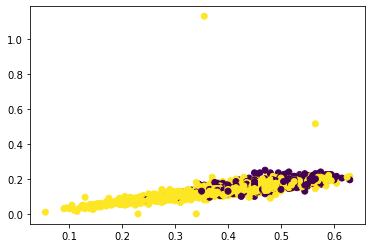

In [24]:

import matplotlib.pyplot as plt
plt.scatter(NN['Diameter'], NN['Height'],c=NN['predict'])

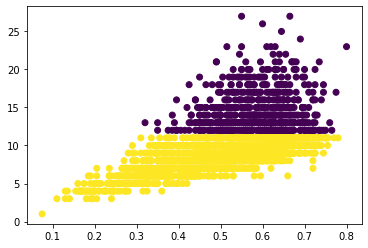

In [25]:
import matplotlib.pyplot as plt
plt.scatter(NN['Length'], NN['Rings'],c=NN['predict'])

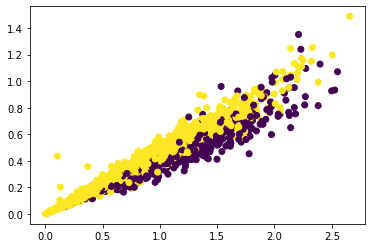

In [26]:
import matplotlib.pyplot as plt
plt.scatter(NN['Whole weight'], NN['Shucked weight'],c=NN['predict'])

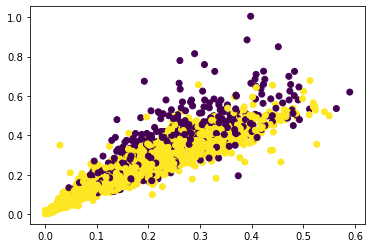

In [27]:
import matplotlib.pyplot as plt
plt.scatter(NN['Viscera weight'], NN['Shell weight'],c=NN['predict'])

# Evaluate its quality by comparing each abalone in each cluster to that data point/abalone first attribute value.

Text(0, 0.5, 'height')

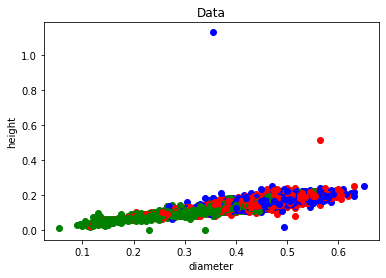

In [28]:
colors={'M':'r','I':'g','F':'b'}
fig,ax=plt.subplots()
for i in range(len(df['Diameter'])):
    ax.scatter(df['Diameter'][i],df['Height'][i],color=colors[df['Sex'][i]])
ax.set_title('Data')
ax.set_xlabel('diameter')
ax.set_ylabel('height')

Text(0, 0.5, 'Rings')

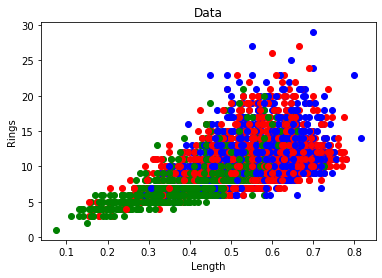

In [39]:
colors={'M':'r','I':'g','F':'b'}
fig,ax=plt.subplots()
for i in range(len(df['Length'])):
    ax.scatter(df['Length'][i],df['Rings'][i],color=colors[df['Sex'][i]])
ax.set_title('Data')
ax.set_xlabel('Length')
ax.set_ylabel('Rings')

Text(0, 0.5, 'Shucked weight')

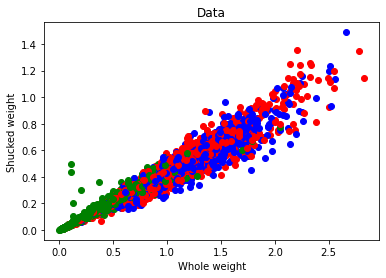

In [41]:
colors={'M':'r','I':'g','F':'b'}
fig,ax=plt.subplots()
for i in range(len(df['Whole weight'])):
    ax.scatter(df['Whole weight'][i],df['Shucked weight'][i],color=colors[df['Sex'][i]])
ax.set_title('Data')
ax.set_xlabel('Whole weight')
ax.set_ylabel('Shucked weight')

Text(0, 0.5, 'Shell weight')

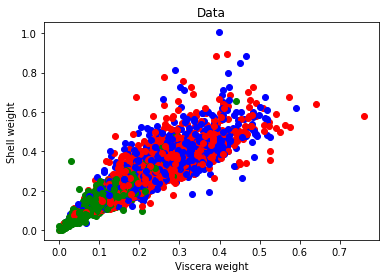

In [52]:
colors={'M':'r','I':'g','F':'b'}
fig,ax=plt.subplots()
for i in range(len(df['Viscera weight'])):
    ax.scatter(df['Viscera weight'][i],df['Shell weight'][i],color=colors[df['Sex'][i]])
ax.set_title('Data')
ax.set_xlabel('Viscera weight')
ax.set_ylabel('Shell weight')

# CONCLUSION 
  -- By evaluating each cluster to the frst attribute we can conclude that the observed data set conforms well to the expected    three categories of individuals.

# 

# HIERARCHICAL CLUSTERING - BY KHUSABHU & SIDDHANTH 

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [34]:
#normalize the data
data_scaled=normalize(X_train)
data_scaled=pd.DataFrame(data_scaled,columns=X_train.columns)

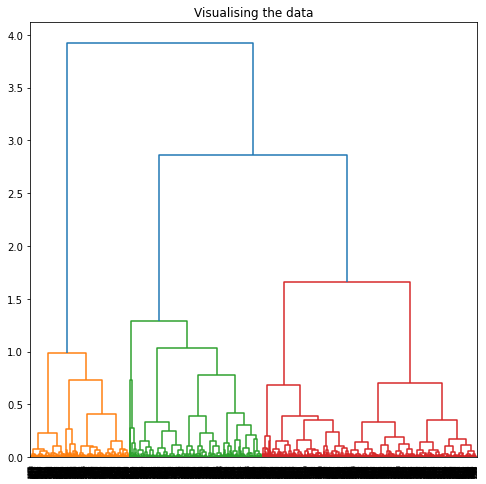

In [36]:
# Create the Dendogram plot
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = sch.dendrogram((sch.linkage(data_scaled, method ='ward')))


In [37]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    #building clustering model
    km = AgglomerativeClustering(n_clusters = k,linkage="ward").fit(data_scaled)
 #training the model and storing
    labels_km=km.fit_predict(data_scaled)
    print('Cluster: ',k,'Silhoutte score :' ,silhouette_score(data_scaled, labels_km))



Cluster:  2 Silhoutte score : 0.5094750980584025
Cluster:  3 Silhoutte score : 0.46021853368052346
Cluster:  4 Silhoutte score : 0.3866342149341041
Cluster:  5 Silhoutte score : 0.39742458175066486
Cluster:  6 Silhoutte score : 0.3928812885291298
Cluster:  7 Silhoutte score : 0.34963902241612427
Cluster:  8 Silhoutte score : 0.3624864500742535
Cluster:  9 Silhoutte score : 0.36313437607322735


In [38]:
#Creating the model
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean' , linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

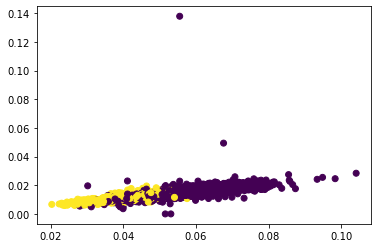

In [49]:
#plt.figure(figsize=(8, 4))
plt.scatter(data_scaled['Length'], data_scaled['Height'], c=cluster.labels_ )

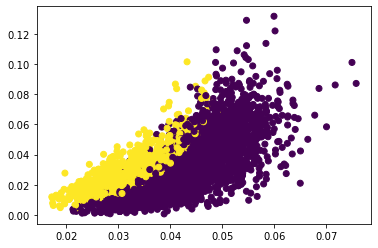

In [50]:
#plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Diameter'], data_scaled['Shucked weight'], c=cluster.labels_)

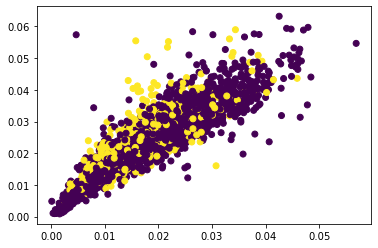

In [51]:
#plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Viscera weight'], data_scaled['Shell weight'], c=cluster.labels_)

# Evaluate its quality by comparing each abalone in each cluster to that data point/abalone first attribute value.

Text(0, 0.5, 'height')

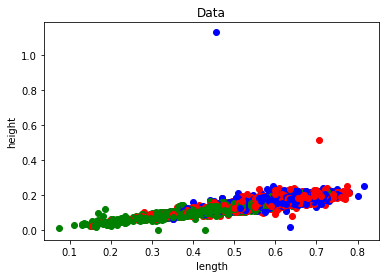

In [42]:
colors={'M':'r','I':'g','F':'b'}
fig,ax=plt.subplots()
for i in range(len(df['Length'])):
    ax.scatter(df['Length'][i],df['Height'][i],color=colors[df['Sex'][i]])
ax.set_title('Data')
ax.set_xlabel('length')
ax.set_ylabel('height')

Text(0, 0.5, 'Shucked weight')

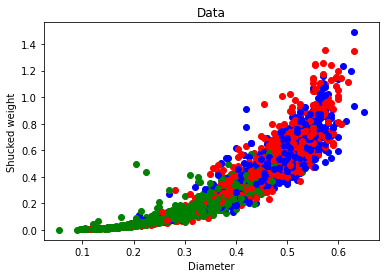

In [43]:
colors={'M':'r','I':'g','F':'b'}
fig,ax=plt.subplots()
for i in range(len(df['Diameter'])):
    ax.scatter(df['Diameter'][i],df['Shucked weight'][i],color=colors[df['Sex'][i]])
ax.set_title('Data')
ax.set_xlabel('Diameter')
ax.set_ylabel('Shucked weight')

Text(0, 0.5, 'Shell weight')

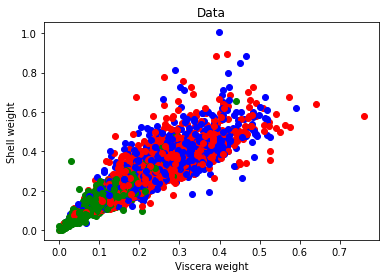

In [44]:
colors={'M':'r','I':'g','F':'b'}
fig,ax=plt.subplots()
for i in range(len(df['Viscera weight'])):
    ax.scatter(df['Viscera weight'][i],df['Shell weight'][i],color=colors[df['Sex'][i]])
ax.set_title('Data')
ax.set_xlabel('Viscera weight')
ax.set_ylabel('Shell weight')

# CONCLUSION
-- By evaluating each cluster to the frst attribute we can conclude that the observed data set conforms well to the expected three categories of individuals.